# AL TABLEAU WITH VARYING pH

In [13]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-19);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [14]:
% define equilibrium problem

AlT=1e-16;  pH=3:1:4; pe=20.75-pH; T=25; show=0;


In [15]:
% MODEL USING TABLEAU (different gradients or log versus linear variables)
%graphics_toolkit("notebook")
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
%database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

for i=1:length(pH)

TOTALS=[AlT]';
TOTALS(TOTALS==0)=1e-16;% get rid of zero values, b/c div by zero error
%TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

tic;
[AlOH3,MASSERR]=Altableau(pH(i),pe(i),T,flag1,flag2,flag3,flag4,flag5);
tableautime=toc;

end

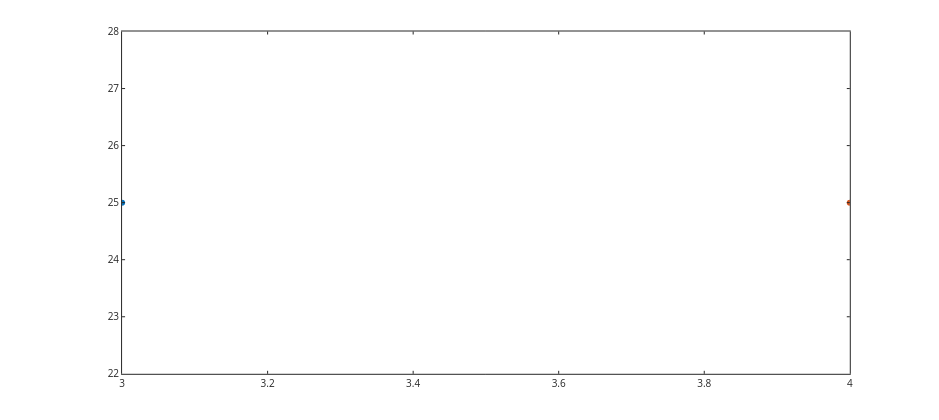

In [16]:
plot(pH,AlOH3)